In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold
import tensorflow as tf

In [56]:
df = pd.read_csv('WHR-Cleaned.csv')
df.head()

,Unnamed: 0,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-2017, unbalanced panel",GINI Index(Household Income)
0,8,Afghanistan,2016,4.220169,7.471376,0.559072,53.000000,0.522566,0.053188,0.793246,0.564953,0.348332,0.324990,-1.855448,-1.394648,1.796219,0.425627,0.382801,0.418629
1,9,Afghanistan,2017,2.661718,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,0.371326,0.261179,-1.896539,-1.440218,1.454051,0.546283,0.382801,0.286599
2,10,Afghanistan,2018,2.694303,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,0.404904,0.364666,-1.870725,-1.438761,1.408344,0.522712,0.382801,0.290681
3,11,Afghanistan,2019,2.375092,7.458469,0.419973,52.400002,0.393656,-0.096549,0.923849,0.351387,0.502474,0.341482,-1.874237,-1.424542,1.412905,0.594884,0.382801,0.374930
4,20,Albania,2016,4.511101,9.337564,0.638411,68.099998,0.729819,-0.017473,0.901071,0.675244,0.321706,0.400910,0.257297,-0.132960,2.646668,0.586701,0.303250,0.416540


In [12]:
df_orig = pd.read_csv('WHR-Cleaned.csv')
df_orig.head()
df_orig.info

<bound method DataFrame.info of      Unnamed: 0 Country name  year  Life Ladder  Log GDP per capita  \
0             8  Afghanistan  2016     4.220169            7.471376   
1             9  Afghanistan  2017     2.661718            7.472197   
2            10  Afghanistan  2018     2.694303            7.458603   
3            11  Afghanistan  2019     2.375092            7.458469   
4            20      Albania  2016     4.511101            9.337564   
..          ...          ...   ...          ...                 ...   
545        1833       Zambia  2019     3.306797            8.224403   
546        1844     Zimbabwe  2016     3.735400            7.819675   
547        1845     Zimbabwe  2017     3.638300            7.851042   
548        1846     Zimbabwe  2018     3.616480            7.896704   
549        1847     Zimbabwe  2019     2.693523            7.850442   

     Social support  Healthy life expectancy at birth  \
0          0.559072                         53.000000   
1

### Creating Training Set and Test Set
Training set contains data from 2016-18 whereas test set contains data for 2019.

In [13]:
df_train = df_orig[(df_orig['year']>=2016) & (df_orig['year']<2019)]
df_test = df_orig[df_orig['year'] == 2019]
df_train.head()

,Unnamed: 0,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-2017, unbalanced panel",GINI Index(Household Income)
0,8,Afghanistan,2016,4.220169,7.471376,0.559072,53.000000,0.522566,0.053188,0.793246,0.564953,0.348332,0.324990,-1.855448,-1.394648,1.796219,0.425627,0.382801,0.418629
1,9,Afghanistan,2017,2.661718,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,0.371326,0.261179,-1.896539,-1.440218,1.454051,0.546283,0.382801,0.286599
2,10,Afghanistan,2018,2.694303,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,0.404904,0.364666,-1.870725,-1.438761,1.408344,0.522712,0.382801,0.290681
4,20,Albania,2016,4.511101,9.337564,0.638411,68.099998,0.729819,-0.017473,0.901071,0.675244,0.321706,0.400910,0.257297,-0.132960,2.646668,0.586701,0.303250,0.416540
5,21,Albania,2017,4.639548,9.376133,0.637698,68.400002,0.749611,-0.029357,0.876135,0.669241,0.333884,0.457738,0.290326,-0.128311,2.682105,0.578096,0.303250,0.410488


In [14]:
df_test.shape

(135, 19)

In [15]:
y_train = df_train['Life Ladder']
X_train = df_train.drop(['Unnamed: 0','Country name','year','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','GINI index (World Bank estimate), average 2000-2017, unbalanced panel','Life Ladder'],axis=1)
X_train.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI Index(Household Income)
0,7.471376,0.559072,53.000000,0.522566,0.053188,0.793246,0.564953,0.348332,0.324990,-1.855448,-1.394648,0.418629
1,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,0.371326,0.261179,-1.896539,-1.440218,0.286599
2,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,0.404904,0.364666,-1.870725,-1.438761,0.290681
4,9.337564,0.638411,68.099998,0.729819,-0.017473,0.901071,0.675244,0.321706,0.400910,0.257297,-0.132960,0.416540
5,9.376133,0.637698,68.400002,0.749611,-0.029357,0.876135,0.669241,0.333884,0.457738,0.290326,-0.128311,0.410488


In [16]:
y_test = df_test['Life Ladder']
X_test = df_test.drop(['Unnamed: 0','Country name','year','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','GINI index (World Bank estimate), average 2000-2017, unbalanced panel','Life Ladder'],axis=1)
X_test.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI Index(Household Income)
3,7.458469,0.419973,52.400002,0.393656,-0.096549,0.923849,0.351387,0.502474,0.341482,-1.874237,-1.424542,0.374930
7,9.456569,0.686365,69.000000,0.777351,-0.100784,0.914284,0.681080,0.273827,0.336628,0.280619,-0.130225,0.397716
11,9.537369,0.803259,66.099998,0.385083,-0.017092,0.740609,0.584944,0.215198,0.496354,-0.926001,-0.800947,0.304484
15,9.772140,0.896371,69.000000,0.817053,-0.202615,0.830460,0.825965,0.319055,0.273853,0.329829,-0.180741,0.396574
22,10.725492,0.942774,73.900002,0.917537,0.117622,0.430209,0.770044,0.202190,0.468700,1.179634,1.752250,0.577556


### Don't run the code below for train test split 

In [57]:
df = df.drop(['Unnamed: 0','Country name','year','Standard deviation of ladder by country-year','Standard deviation/Mean of ladder by country-year','GINI index (World Bank estimate), average 2000-2017, unbalanced panel'],axis=1)
df.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI Index(Household Income)
0,4.220169,7.471376,0.559072,53.000000,0.522566,0.053188,0.793246,0.564953,0.348332,0.324990,-1.855448,-1.394648,0.418629
1,2.661718,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,0.371326,0.261179,-1.896539,-1.440218,0.286599
2,2.694303,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,0.404904,0.364666,-1.870725,-1.438761,0.290681
3,2.375092,7.458469,0.419973,52.400002,0.393656,-0.096549,0.923849,0.351387,0.502474,0.341482,-1.874237,-1.424542,0.374930
4,4.511101,9.337564,0.638411,68.099998,0.729819,-0.017473,0.901071,0.675244,0.321706,0.400910,0.257297,-0.132960,0.416540


In [58]:
y = df['Life Ladder']
X = df.drop(['Life Ladder'],axis=1)
X.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI Index(Household Income)
0,7.471376,0.559072,53.000000,0.522566,0.053188,0.793246,0.564953,0.348332,0.324990,-1.855448,-1.394648,0.418629
1,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,0.371326,0.261179,-1.896539,-1.440218,0.286599
2,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,0.404904,0.364666,-1.870725,-1.438761,0.290681
3,7.458469,0.419973,52.400002,0.393656,-0.096549,0.923849,0.351387,0.502474,0.341482,-1.874237,-1.424542,0.374930
4,9.337564,0.638411,68.099998,0.729819,-0.017473,0.901071,0.675244,0.321706,0.400910,0.257297,-0.132960,0.416540


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=26)
X_train.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,GINI Index(Household Income)
254,11.086010,0.841520,66.900002,0.867274,-0.133299,0.731486,0.695363,0.302876,0.496354,-0.332906,-0.118299,0.594828
50,8.877026,0.784301,63.900002,0.881311,-0.078627,0.857220,0.751408,0.419328,0.300631,-0.145814,-0.796306,0.420674
449,9.404648,0.841344,56.500000,0.752731,-0.055172,0.841193,0.812167,0.282708,0.524686,0.190358,0.097057,0.685775
195,10.155218,0.899512,66.800003,0.553952,-0.188924,0.924186,0.665911,0.243326,0.303772,0.527965,0.397006,0.301498
414,10.139473,0.908726,64.300003,0.729282,-0.152118,0.865312,0.673346,0.198796,0.455839,-0.780864,-0.565451,0.395371


In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Instructions for updating:
Use tf.cast instead.
Baseline: -0.41 (0.12) MSE


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Larger: %.2f (%.2f) MAE" % (results.mean(), results.std()))

Epoch 1/50
495/495 [==============================] - 1s 2ms/step - loss: 5.3545
Epoch 2/50
495/495 [==============================] - 0s 601us/step - loss: 3.5797
Epoch 3/50
495/495 [==============================] - 0s 602us/step - loss: 1.4987
Epoch 4/50
495/495 [==============================] - 0s 634us/step - loss: 1.0257
Epoch 5/50
495/495 [==============================] - 0s 613us/step - loss: 0.7778
Epoch 6/50
495/495 [==============================] - 0s 597us/step - loss: 0.6673
Epoch 7/50
495/495 [==============================] - 0s 581us/step - loss: 0.5953
Epoch 8/50
495/495 [==============================] - 0s 658us/step - loss: 0.5508
Epoch 9/50
495/495 [==============================] - 0s 593us/step - loss: 0.5227
Epoch 10/50
495/495 [==============================] - 0s 611us/step - loss: 0.4930
Epoch 11/50
495/495 [==============================] - 0s 607us/step - loss: 0.4831
Epoch 12/50
495/495 [==============================] - 0s 618us/step - loss: 0.4631
Epo

495/495 [==============================] - 0s 629us/step - loss: 0.3653
Epoch 45/50
495/495 [==============================] - 0s 523us/step - loss: 0.3652
Epoch 46/50
495/495 [==============================] - 0s 693us/step - loss: 0.3647
Epoch 47/50
495/495 [==============================] - 0s 667us/step - loss: 0.3608
Epoch 48/50
495/495 [==============================] - 0s 680us/step - loss: 0.3624
Epoch 49/50
495/495 [==============================] - 0s 583us/step - loss: 0.3673
Epoch 50/50
55/55 [==============================] - 1s 12ms/step
Epoch 1/50
495/495 [==============================] - 1s 2ms/step - loss: 5.4051
Epoch 2/50
495/495 [==============================] - 0s 629us/step - loss: 3.8346
Epoch 3/50
495/495 [==============================] - 0s 629us/step - loss: 1.5303
Epoch 4/50
495/495 [==============================] - 0s 599us/step - loss: 0.9920
Epoch 5/50
495/495 [==============================] - 0s 591us/step - loss: 0.7833
Epoch 6/50
495/495 [=========

495/495 [==============================] - 0s 708us/step - loss: 0.3599
Epoch 37/50
495/495 [==============================] - 0s 677us/step - loss: 0.3604
Epoch 38/50
495/495 [==============================] - 0s 624us/step - loss: 0.3614
Epoch 39/50
495/495 [==============================] - 0s 619us/step - loss: 0.3518
Epoch 40/50
495/495 [==============================] - 0s 628us/step - loss: 0.3579
Epoch 41/50
495/495 [==============================] - 0s 682us/step - loss: 0.3534
Epoch 42/50
495/495 [==============================] - 0s 608us/step - loss: 0.3558
Epoch 43/50
495/495 [==============================] - 0s 647us/step - loss: 0.3530
Epoch 44/50
495/495 [==============================] - 0s 638us/step - loss: 0.3563
Epoch 45/50
495/495 [==============================] - 0s 627us/step - loss: 0.3537
Epoch 46/50
495/495 [==============================] - 0s 584us/step - loss: 0.3527
Epoch 47/50
495/495 [==============================] - 0s 642us/step - loss: 0.3539
Epoc

A shallow neural network with 1 hidden layer containing 12 neurons yielded

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [45]:
#Variables
#dataset=np.loadtxt("cars.csv", delimiter=",")
x=X
y=y.to_numpy()
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [46]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [47]:
model = Sequential()
model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])

In [52]:
>>> history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 329 samples, validate on 83 samples
Epoch 1/150
329/329 [==============================] - 1s 3ms/sample - loss: 0.0089 - mean_squared_error: 0.0089 - mean_absolute_error: 0.0740 - acc: 0.0030 - val_loss: 0.0111 - val_mean_squared_error: 0.0111 - val_mean_absolute_error: 0.0831 - val_acc: 0.0120
Epoch 2/150
329/329 [==============================] - 0s 134us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - mean_absolute_error: 0.0748 - acc: 0.0030 - val_loss: 0.0085 - val_mean_squared_error: 0.0085 - val_mean_absolute_error: 0.0699 - val_acc: 0.0120
Epoch 3/150
329/329 [==============================] - 0s 144us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - mean_absolute_error: 0.0731 - acc: 0.0030 - val_loss: 0.0103 - val_mean_squared_error: 0.0103 - val_mean_absolute_error: 0.0786 - val_acc: 0.0120
Epoch 4/150
329/329 [==============================] - 0s 151us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - mean_absolute_error: 0.0726 - acc: 0.0030 - val_los

Epoch 32/150
329/329 [==============================] - 0s 154us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0700 - acc: 0.0030 - val_loss: 0.0089 - val_mean_squared_error: 0.0089 - val_mean_absolute_error: 0.0720 - val_acc: 0.0120
Epoch 33/150
329/329 [==============================] - 0s 131us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0704 - acc: 0.0030 - val_loss: 0.0086 - val_mean_squared_error: 0.0086 - val_mean_absolute_error: 0.0708 - val_acc: 0.0120
Epoch 34/150
329/329 [==============================] - 0s 134us/sample - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0706 - acc: 0.0030 - val_loss: 0.0090 - val_mean_squared_error: 0.0090 - val_mean_absolute_error: 0.0727 - val_acc: 0.0120
Epoch 35/150
329/329 [==============================] - 0s 155us/sample - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0702 - acc: 0.0030 - val_loss: 0.0086 - val_mean_squared_error: 0.0

329/329 [==============================] - 0s 117us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0676 - acc: 0.0030 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0685 - val_acc: 0.0120
Epoch 64/150
329/329 [==============================] - 0s 118us/sample - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0678 - acc: 0.0030 - val_loss: 0.0085 - val_mean_squared_error: 0.0085 - val_mean_absolute_error: 0.0711 - val_acc: 0.0120
Epoch 65/150
329/329 [==============================] - 0s 157us/sample - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0688 - acc: 0.0030 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0691 - val_acc: 0.0120
Epoch 66/150
329/329 [==============================] - 0s 130us/sample - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0682 - acc: 0.0030 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mea

Epoch 125/150
329/329 [==============================] - 0s 147us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0643 - acc: 0.0030 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0684 - val_acc: 0.0120
Epoch 126/150
329/329 [==============================] - 0s 154us/sample - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0641 - acc: 0.0030 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0647 - val_acc: 0.0120
Epoch 127/150
329/329 [==============================] - 0s 169us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0647 - acc: 0.0030 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0682 - val_acc: 0.0120
Epoch 128/150
329/329 [==============================] - 0s 164us/sample - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0637 - acc: 0.0030 - val_loss: 0.0074 - val_mean_squared_error:

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'acc', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_acc'])


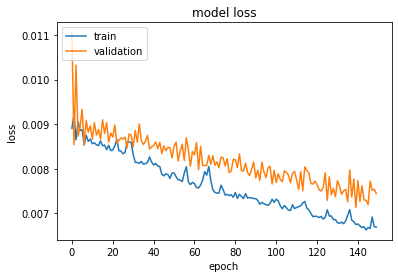

In [53]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Deep Learning Models

In [98]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [11]:
#Standardizing data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

200    7.476214
310    4.678160
251    6.425144
189    6.019986
36     5.552915
         ...   
374    7.596332
459    4.330945
532    5.005663
222    7.331036
219    6.962336
Name: Life Ladder, Length: 110, dtype: float64

In [12]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, input_shape=(12, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 65        
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________


In [196]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Train on 394 samples, validate on 21 samples
Epoch 1/100
394/394 [==============================] - 1s 2ms/step - loss: 22.5499 - mae: 4.5376 - val_loss: 8.6868 - val_mae: 2.5644
Epoch 2/100
394/394 [==============================] - 0s 109us/step - loss: 8.7820 - mae: 2.6058 - val_loss: 4.7022 - val_mae: 1.7015
Epoch 3/100
394/394 [==============================] - 0s 92us/step - loss: 3.0509 - mae: 1.4016 - val_loss: 5.3947 - val_mae: 1.6928
Epoch 4/100
394/394 [==============================] - 0s 113us/step - loss: 1.8228 - mae: 1.0604 - val_loss: 2.9630 - val_mae: 1.3447
Epoch 5/100
394/394 [==============================] - 0s 108us/step - loss: 1.1857 - mae: 0.8669 - val_loss: 2.4817 - val_mae: 1.2523
Epoch 6/100
394/394 [==============================] - 0s 96us/step - loss: 0.9626 - mae: 0.7733 - val_loss: 2.7362 - val_mae: 1.2624
Epoch 7/100
394/394 [==============================] - 0s 112us/step - loss: 0.8968 - mae: 0.7435 - val_loss: 2.3457 - val_mae: 1.1920
Epoch 8/100
3

In [197]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()


In [198]:
nn_pred = model.predict(X_test)
nn_pred

array([[2.8933334],
       [5.457189 ],
       [5.54822  ],
       [6.3579655],
       [6.93877  ],
       [7.273065 ],
       [6.072989 ],
       [4.2099595],
       [5.5899262],
       [6.1359234],
       [4.7772927],
       [6.1185384],
       [5.880189 ],
       [3.9470606],
       [5.95029  ],
       [5.962604 ],
       [4.490169 ],
       [5.2067885],
       [4.582256 ],
       [7.4189186],
       [4.6872287],
       [6.400295 ],
       [5.9665685],
       [6.0158935],
       [4.8386207],
       [7.08719  ],
       [5.9364753],
       [5.924272 ],
       [7.458736 ],
       [5.7103815],
       [6.5348163],
       [4.7581787],
       [5.294619 ],
       [6.2758875],
       [4.5718327],
       [7.1900306],
       [6.814128 ],
       [5.127953 ],
       [4.912585 ],
       [4.3535013],
       [6.655174 ],
       [4.752811 ],
       [5.54063  ],
       [6.1298223],
       [4.265863 ],
       [5.945692 ],
       [6.7156835],
       [6.004936 ],
       [7.4691825],
       [3.9787214],


In [199]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)
r2_nn = r2_score(y_test, nn_pred)
print('R2 on test data: ', r2_nn)

135/135 [==============================] - 0s 85us/step
Mean squared error on test data:  0.24887597560882568
Mean absolute error on test data:  0.37825411558151245
R2 on test data:  0.7990393591147118


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)
print('R2 on test data: ', r2_lr)

Mean squared error on test data:  0.3099498824645564
Mean absolute error on test data:  0.4298719231524537
R2 on test data:  0.749723821721465


In [201]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error on test data: ', mse_dt)
print('Mean absolute error on test data: ', mae_dt)
r2_dt = r2_score(y_test, y_pred_tree)
print('R2 on test data: ', r2_dt)

Mean squared error on test data:  0.47664105136830826
Mean absolute error on test data:  0.45918177851924175
R2 on test data:  0.6151251944392513


In [18]:
from neupy import algorithms
nw = algorithms.GRNN(std=0.2, verbose=False)
nw.train(X_train, y_train)
y_pred_grnn = nw.predict(X_test)
mse_grnn = mean_squared_error(y_test, y_pred_grnn)
mae_grnn = mean_absolute_error(y_test, y_pred_grnn)
print('Mean squared error on test data: ', mse_grnn)
print('Mean absolute error on test data: ', mae_grnn)
r2_grnn = r2_score(y_test, y_pred_grnn)
print('R2 on test data: ', r2_grnn)

Mean squared error on test data:  0.17081294624786086
Mean absolute error on test data:  0.2857108806588018
R2 on test data:  0.8620731485765282


In [203]:
from xgboost import XGBRFRegressor
model = XGBRFRegressor()
model.fit(X_train,y_train)
y_pred_xgb = model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print('Mean squared error on test data: ', mse_xgb)
print('Mean absolute error on test data: ', mae_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print('R2 on test data: ', r2_xgb)

Mean squared error on test data:  0.2254601720676553
Mean absolute error on test data:  0.3498001593130606
R2 on test data:  0.8179469862339236


In [204]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred_rf = model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Mean squared error on test data: ', mse_rf)
print('Mean absolute error on test data: ', mae_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('R2 on test data: ', r2_rf)

Mean squared error on test data:  0.19410598449598948
Mean absolute error on test data:  0.3215118460198977
R2 on test data:  0.8432646478380128


In [20]:
from sklearn.linear_model import Ridge
#from sklearn.kernel_ridge import KernelRidge
model = Ridge()
model.fit(X_train,y_train)
y_pred_enet = model.predict(X_test)
mse_enet = mean_squared_error(y_test, y_pred_enet)
mae_enet = mean_absolute_error(y_test, y_pred_enet)
print('Mean squared error on test data: ', mse_enet)
print('Mean absolute error on test data: ', mae_enet)
r2_enet = r2_score(y_test, y_pred_enet)
print('R2 on test data: ', r2_enet)

Mean squared error on test data:  0.3095341234319303
Mean absolute error on test data:  0.42933916768193653
R2 on test data:  0.7500595359373992


In [19]:
comparisons = pd.DataFrame(y_test)
comparisons['GRNN Predictions']= y_pred_grnn

In [20]:
comparisons.columns = ['Actual Life Ladder','GRNN Predictions']
comparisons.head(20)

,Actual Life Ladder,GRNN Predictions
3,2.375092,2.693576
7,4.995318,5.029815
11,4.744627,5.162935
15,6.085561,5.804086
22,7.233995,7.177563
26,7.195361,7.299338
30,5.173389,5.168031
34,5.114217,4.505914
38,5.821453,5.234563
42,6.772138,6.894150


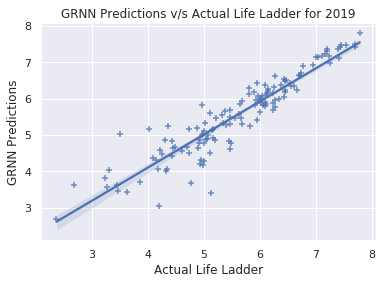

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
#tips = sns.load_dataset("tips")
ax1 = sns.regplot(x="Actual Life Ladder", y="GRNN Predictions", data=comparisons,marker= '+',x_ci='ci',ci=90)
ax1.set_title('GRNN Predictions v/s Actual Life Ladder for 2019')


#bbox = dict(boxstyle ="round", fc ="0.95") 
#arrowprops = dict( facecolor ='red',
 #   arrowstyle = "->", 
  #  connectionstyle = "angle, angleA = 0, angleB = 90,rad = 10") 
#ax1.annotate("Mexico", xy =(6.431945,5.299861), 
 #               xytext =(6.431945,5.299861), arrowprops = dict(facecolor ='red', 
           #                       shrink = 0.05))
#ax1.annotate("Italy", xy =(6.445417,5.478643), 
 #               xytext =(7.445417,6.478643), arrowprops = dict(facecolor ='red', 
            #                      shrink = 0.05))
#ax1.annotate("Zimbabwe", xy =(2.693523,3.617303), 
 #               xytext =(2.693523,3.617303), arrowprops = dict(facecolor ='red', 
             #                     shrink = 0.05))
#ax1.annotate("Niger", xy =(5.003544,4.117939), 
 #               xytext =(5.003544,4.117939), arrowprops = dict(facecolor ='red', 
              #                    shrink = 0.05))
#ax1.annotate("Nigeria", xy =(4.356419,5.219585), 
 #               xytext =(4.356419,5.219585), arrowprops = dict(facecolor ='red', 
               #                   shrink = 0.05))
#ax1.annotate("Sierra Leone", xy =(3.447381,4.305683), 
 #               xytext =(3.447381,6.305683), arrowprops = dict(facecolor ='red', 
                #                  shrink = 0.05))
#ax1.annotate("Turkmenistan", xy =(5.474300,4.620602), 
 #               xytext =(6.0,4.620602), arrowprops = dict(facecolor ='red', 
    #                              shrink = 0.05))
#ax.set_xlim(-2, 2) 
plt.savefig('GRNN_Predictions.pdf')

Text(0.5, 1.0, 'Residuals')

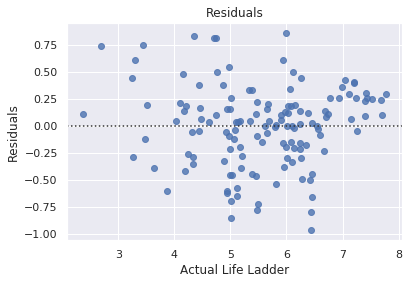

In [207]:
ax2 = sns.residplot(x="Actual Life Ladder", y="GRNN Predictions", data=comparisons)
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals')

In [209]:
comparisons['residual'] = abs(comparisons['GRNN Predictions']-comparisons['Actual Life Ladder'])
comp_sorted = comparisons.sort_values(by= 'residual',ascending=False)
comp_sorted.head(10)

,Actual Life Ladder,GRNN Predictions,residual
320,6.431945,5.299861,1.132085
227,6.445417,5.478643,0.966774
549,2.693523,3.617303,0.923780
366,5.003544,4.117939,0.885605
370,4.356419,5.219585,0.863166
434,3.447381,4.305683,0.858302
501,5.474300,4.620602,0.853698
62,6.451149,5.629754,0.821395
509,4.701762,5.513500,0.811738
11,4.744627,5.552915,0.808288


In [213]:
comparisons['High Residual'] = comparisons['residual']>=0.85
comparisons.head()
comp_sorted = comparisons.sort_values(by= 'residual',ascending=False)
comp_sorted.head(7)

,Actual Life Ladder,GRNN Predictions,residual,High Residual
320,6.431945,5.299861,1.132085,True
227,6.445417,5.478643,0.966774,True
549,2.693523,3.617303,0.923780,True
366,5.003544,4.117939,0.885605,True
370,4.356419,5.219585,0.863166,True
434,3.447381,4.305683,0.858302,True
501,5.474300,4.620602,0.853698,True


## Results:-
When compared to the model predictions for the year 2019, countires such as Zimbabwe, Nigeria, Sierra Leone observed a decrease in happiness.Whereas Mexico, Italy,Niger and Turkministan observed an increase in happiness. 

In [220]:
df_orig.iloc[501,]

Unnamed: 0                                                                       1685
Country name                                                             Turkmenistan
year                                                                             2019
Life Ladder                                                                    5.4743
Log GDP per capita                                                            9.78756
Social support                                                               0.981502
Healthy life expectancy at birth                                                 62.6
Freedom to make life choices                                                 0.891527
Generosity                                                                   0.266943
Perceptions of corruption                                                    0.731486
Positive affect                                                              0.509915
Negative affect                                       

In [6]:
!pip install lazypredict

In [13]:
!pip install lightgbm

     |████████████████████████████████| 1.2 MB 1.1 MB/s eta 0:00:01     |████                            | 153 kB 1.1 MB/s eta 0:00:02


In [20]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [21]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 82%|████████▎ | 33/40 [00:02<00:00, 11.85it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 95%|█████████▌| 38/40 [00:02<00:00, 12.17it/s]

Learning rate set to 0.033374
0:	learn: 1.0770553	total: 57ms	remaining: 57s
1:	learn: 1.0554135	total: 66.7ms	remaining: 33.3s
2:	learn: 1.0341311	total: 76.8ms	remaining: 25.5s
3:	learn: 1.0143922	total: 93.8ms	remaining: 23.4s
4:	learn: 0.9948341	total: 110ms	remaining: 22s
5:	learn: 0.9740135	total: 120ms	remaining: 19.9s
6:	learn: 0.9561550	total: 130ms	remaining: 18.5s
7:	learn: 0.9369251	total: 141ms	remaining: 17.5s
8:	learn: 0.9178350	total: 154ms	remaining: 16.9s
9:	learn: 0.9003087	total: 169ms	remaining: 16.7s
10:	learn: 0.8834945	total: 174ms	remaining: 15.7s
11:	learn: 0.8679210	total: 178ms	remaining: 14.7s
12:	learn: 0.8505174	total: 182ms	remaining: 13.8s
13:	learn: 0.8362375	total: 186ms	remaining: 13.1s
14:	learn: 0.8204813	total: 190ms	remaining: 12.5s
15:	learn: 0.8056880	total: 193ms	remaining: 11.8s
16:	learn: 0.7915187	total: 199ms	remaining: 11.5s
17:	learn: 0.7776297	total: 203ms	remaining: 11s
18:	learn: 0.7644148	total: 206ms	remaining: 10.6s
19:	learn: 0.75

240:	learn: 0.2523654	total: 574ms	remaining: 1.81s
241:	learn: 0.2520989	total: 576ms	remaining: 1.8s
242:	learn: 0.2514520	total: 578ms	remaining: 1.8s
243:	learn: 0.2507505	total: 582ms	remaining: 1.8s
244:	learn: 0.2502541	total: 583ms	remaining: 1.8s
245:	learn: 0.2496536	total: 585ms	remaining: 1.79s
246:	learn: 0.2492103	total: 587ms	remaining: 1.79s
247:	learn: 0.2481050	total: 589ms	remaining: 1.79s
248:	learn: 0.2476698	total: 591ms	remaining: 1.78s
249:	learn: 0.2470206	total: 597ms	remaining: 1.79s
250:	learn: 0.2461660	total: 599ms	remaining: 1.79s
251:	learn: 0.2453009	total: 600ms	remaining: 1.78s
252:	learn: 0.2446153	total: 601ms	remaining: 1.77s
253:	learn: 0.2437415	total: 603ms	remaining: 1.77s
254:	learn: 0.2431685	total: 604ms	remaining: 1.76s
255:	learn: 0.2424099	total: 606ms	remaining: 1.76s
256:	learn: 0.2423323	total: 606ms	remaining: 1.75s
257:	learn: 0.2416945	total: 608ms	remaining: 1.75s
258:	learn: 0.2408127	total: 610ms	remaining: 1.75s
259:	learn: 0.24

483:	learn: 0.1469280	total: 947ms	remaining: 1.01s
484:	learn: 0.1464824	total: 949ms	remaining: 1.01s
485:	learn: 0.1463013	total: 951ms	remaining: 1s
486:	learn: 0.1457591	total: 953ms	remaining: 1s
487:	learn: 0.1455349	total: 955ms	remaining: 1s
488:	learn: 0.1452010	total: 956ms	remaining: 999ms
489:	learn: 0.1448171	total: 958ms	remaining: 997ms
490:	learn: 0.1447545	total: 960ms	remaining: 995ms
491:	learn: 0.1444895	total: 962ms	remaining: 993ms
492:	learn: 0.1442015	total: 964ms	remaining: 991ms
493:	learn: 0.1439648	total: 965ms	remaining: 989ms
494:	learn: 0.1438603	total: 967ms	remaining: 987ms
495:	learn: 0.1435783	total: 970ms	remaining: 986ms
496:	learn: 0.1432786	total: 972ms	remaining: 983ms
497:	learn: 0.1430968	total: 973ms	remaining: 981ms
498:	learn: 0.1426264	total: 975ms	remaining: 978ms
499:	learn: 0.1423982	total: 976ms	remaining: 976ms
500:	learn: 0.1423387	total: 979ms	remaining: 975ms
501:	learn: 0.1420021	total: 981ms	remaining: 973ms
502:	learn: 0.1415968

722:	learn: 0.0917499	total: 1.32s	remaining: 505ms
723:	learn: 0.0916040	total: 1.32s	remaining: 503ms
724:	learn: 0.0914368	total: 1.32s	remaining: 502ms
725:	learn: 0.0911947	total: 1.32s	remaining: 500ms
726:	learn: 0.0910893	total: 1.33s	remaining: 498ms
727:	learn: 0.0908557	total: 1.33s	remaining: 496ms
728:	learn: 0.0906833	total: 1.33s	remaining: 494ms
729:	learn: 0.0904854	total: 1.33s	remaining: 493ms
730:	learn: 0.0903730	total: 1.33s	remaining: 491ms
731:	learn: 0.0902823	total: 1.33s	remaining: 489ms
732:	learn: 0.0900934	total: 1.34s	remaining: 488ms
733:	learn: 0.0900786	total: 1.34s	remaining: 486ms
734:	learn: 0.0898136	total: 1.34s	remaining: 484ms
735:	learn: 0.0896488	total: 1.34s	remaining: 482ms
736:	learn: 0.0895405	total: 1.35s	remaining: 480ms
737:	learn: 0.0893201	total: 1.35s	remaining: 479ms
738:	learn: 0.0891301	total: 1.35s	remaining: 477ms
739:	learn: 0.0889318	total: 1.35s	remaining: 475ms
740:	learn: 0.0887332	total: 1.35s	remaining: 474ms
741:	learn: 

959:	learn: 0.0627676	total: 1.69s	remaining: 70.4ms
960:	learn: 0.0626525	total: 1.69s	remaining: 68.7ms
961:	learn: 0.0626381	total: 1.69s	remaining: 67ms
962:	learn: 0.0625746	total: 1.7s	remaining: 65.2ms
963:	learn: 0.0625424	total: 1.7s	remaining: 63.4ms
964:	learn: 0.0624304	total: 1.7s	remaining: 61.7ms
965:	learn: 0.0623192	total: 1.7s	remaining: 59.9ms
966:	learn: 0.0622952	total: 1.7s	remaining: 58.1ms
967:	learn: 0.0622757	total: 1.71s	remaining: 56.4ms
968:	learn: 0.0622662	total: 1.71s	remaining: 54.6ms
969:	learn: 0.0621529	total: 1.71s	remaining: 52.9ms
970:	learn: 0.0621257	total: 1.71s	remaining: 51.2ms
971:	learn: 0.0620357	total: 1.72s	remaining: 49.4ms
972:	learn: 0.0618949	total: 1.72s	remaining: 47.7ms
973:	learn: 0.0618096	total: 1.72s	remaining: 45.9ms
974:	learn: 0.0616438	total: 1.72s	remaining: 44.2ms
975:	learn: 0.0615279	total: 1.72s	remaining: 42.4ms
976:	learn: 0.0614203	total: 1.73s	remaining: 40.6ms
977:	learn: 0.0613573	total: 1.73s	remaining: 38.9ms


100%|██████████| 40/40 [00:05<00:00,  7.92it/s]


In [23]:
print(models,predictions)

                               R-Squared  RMSE  Time Taken
Model                                                     
ExtraTreesRegressor                 0.89  0.37        0.18
CatBoostRegressor                   0.87  0.40        2.18
XGBRegressor                        0.85  0.43        0.35
KNeighborsRegressor                 0.85  0.43        0.01
HistGradientBoostingRegressor       0.84  0.44        0.23
LGBMRegressor                       0.84  0.44        0.08
RandomForestRegressor               0.84  0.44        0.29
GradientBoostingRegressor           0.84  0.45        0.14
SVR                                 0.83  0.46        0.02
NuSVR                               0.83  0.46        0.02
BaggingRegressor                    0.83  0.47        0.04
AdaBoostRegressor                   0.80  0.50        0.16
SGDRegressor                        0.75  0.55        0.01
ElasticNetCV                        0.75  0.55        0.08
RidgeCV                             0.75  0.55        0.